In [1]:
import midynet
import midynet.util.display as display
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import fractions
import json

from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

display.setup_dir("./")

plot = midynet.metrics.Statistics.plot

paths_to_figures = [".", "../../../../papers/p-midynet/paper1-mutual_info/figures"]
paths_to_figures = list(map(pathlib.Path, paths_to_figures))

with open("./thresholds.json", "r") as f:
    thresholds_data = json.load(f)
    
def plot(ax, data, **kwargs):
    x = []
    y = []

    for k in data.keys():
        x.append(float(k))
        y.append(np.mean(data[k]))
    indices = np.argsort(x)
    x = np.array(x)[indices]
    y = np.array(y)[indices]
    ax.plot(x, y, **kwargs)
    return ax

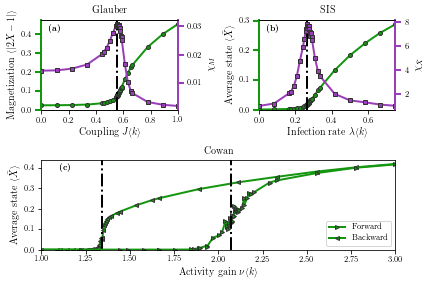

In [2]:
SCALE=1
# fig, ax = plt.subplots(1, 3, figsize=(SCALE*7,SCALE*5/3), sharex=False, sharey=False)
fig = plt.figure()
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax = np.array([
    fig.add_subplot(spec[0, 0]),
    fig.add_subplot(spec[0, 1]),
    fig.add_subplot(spec[1, :]),
])

titles = {
    "ising": r"Glauber", 
    "sis": r"SIS", 
    "cowan_forward": r"Cowan",
    "cowan_backward": r"Cowan"
}

xlabels = {
    "ising": r"Coupling $J\langle k \rangle$",
    "sis": r"Infection rate $\lambda \langle k \rangle$",
    "cowan_backward": r"Activity gain $\nu\langle k \rangle$",
    "cowan_forward": r"Activity gain $\nu\langle k \rangle$"
}

ylabels = {
    "ising": r"Magnetization $\langle |2X - 1|\rangle$",
    "sis": r"Average state $\langle \bar{X}\rangle$",
    "cowan_backward": r"Average state $\langle \bar{X}\rangle$",
    "cowan_forward": r"Average state $\langle \bar{X}\rangle$",
}

yylabels = {
    "ising": r"$\chi_M$",
    "sis": r"$\chi_{\bar{X}}$",
    "cowan_backward": r"NONE",
    "cowan_forward": r"NONE"
}

xlims = {
    "ising": (0., 1.),
    "sis": (0, 0.75),
    "cowan_backward": (1, 3),
    "cowan_forward": (1, 3),
}

threshold_labels = {
    "ising": r"$J_c\langle k\rangle$", 
    "sis": r"$\lambda_c \langle k \rangle$", 
    "cowan_forward": r"$\nu_c^f\langle k \rangle$",
    "cowan_backward": r"$\nu_c^b\langle k \rangle$"
}

avg_color = display.dark_colors["green"]
susc_color = display.dark_colors["purple"]

for i, k in enumerate(xlabels.keys()):
    showSusc = True
    if k[:5] == "cowan":
        i = 2
        showSusc = False
    if k == "cowan_backward":
        marker = "<"
    elif k == "cowan_forward":
        marker = ">"
    else:
        marker = "o"
    plot(ax[i], thresholds_data[k]["averages"], linestyle="-", color=avg_color, marker=marker, markeredgecolor=display.dark_colors["grey"], markersize=4, linewidth=2)
    if showSusc:
        axx = ax[i].twinx()
        plot(axx, thresholds_data[k]["susceptibility"], linestyle="-", color=susc_color, marker="s", markeredgecolor=display.dark_colors["grey"], markersize=4, linewidth=2)
        axx.set_ylabel(yylabels[k], fontsize=display.fontsizes["large"])
        axx.tick_params(axis='y', color=susc_color, length=6, width=2)
        axx.spines['right'].set_color(susc_color)
        axx.spines['right'].set_linewidth(2)
        axx.spines['left'].set_visible(False)
        ax[i].tick_params(axis='y', color=avg_color, length=6, width=2)

        ax[i].spines['left'].set_color(avg_color)
        ax[i].spines['left'].set_linewidth(2)
    t = np.mean(thresholds_data[k]["thresholds"][-1])
    ax[i].axvline(t, linestyle="-.", color="k", linewidth=2)
    dx = ax[i].get_xlim()[-1] - ax[i].get_xlim()[0]
    ymax = ax[i].get_ylim()[-1]
    
    ax[i].set_xlabel(xlabels[k], fontsize=display.fontsizes["large"])
    ax[i].set_ylabel(ylabels[k], fontsize=display.fontsizes["large"])
    x = np.sort([float(k) for k in thresholds_data[k]["susceptibility"].keys()])
    ax[i].set_xlim(xlims[k])
    ax[i].set_ylim([0, ax[i].get_ylim()[-1]])
    ax[i].set_title(titles[k], fontsize=display.fontsizes["large"])
    if k == "cowan_forward":
        continue
    display.Label.plot(ax[i], loc="top left", fontsize=SCALE * display.fontsizes["medium"], box=True)
display.Label.clear()

# ax[i].text(thresholds_data[k]["thresholds"][-1], ymax * 0.8, 
#                       threshold_labels[k], 
#                       fontsize=SCALE * display.fontsizes["large"], 
#                       rotation=90, 
#                       horizontalalignment="left",
#                       va="bottom",
#                      )

handles = [
    Line2D([0], [0], linestyle="-", marker=">", color=avg_color, markeredgecolor=display.dark_colors["grey"], markersize=4, linewidth=2, label="Forward"),
    Line2D([0], [0], linestyle="-", marker="<", color=avg_color, markeredgecolor=display.dark_colors["grey"], markersize=4, linewidth=2, label="Backward"),
]
ax[-1].legend(handles=handles, loc="lower right", fontsize=display.fontsizes["medium"])

fig.tight_layout()
for p in paths_to_figures:
    fig.savefig(p / "svg/p1-figure5.svg", bbox_inches='tight')
    fig.savefig(p / "pdf/p1-figure5.pdf", bbox_inches='tight')
    fig.savefig(p / "png/p1-figure5.png", bbox_inches='tight')
plt.show()